# ASSIGNMENT 4: CENSUS INCOME DATASET

Name: SHALINI SHREE

NUID: 002769035

# Q1. What is the question?

**PROBLEM STATEMENT**

The prediction objective is to ascertain if a person earns more than $50,000 annually.


**Content**

This dataset contains information about the various factors that can affect the income of a person like the age, no. of working hours, region where they stay, education etc.

* age: age range of different individual participated in the survey.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: number of people the census believes the entry represents.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: number of educational degree a person has.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: number hours worked by a person in a week.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



# Q2. What did you do?

The strategy used to address this issue was to first quickly analyze the data by checking for null values, data type, and description. The data was then cleansed. The mode imputation approach was used to handle null data in the form of "?". We also have displayed each independent variable with the target variable to examine connection between them. The connection was then examined using a heat map to gain a sense of relevant characteristics. The categorical data were then numerically translated utilizing the encoding technique for modeling. We even looked for and treated outliers before fitting the data into the model. The dataset was then divided into two parts: training and testing. We trained the model using a logistic regression model on the training dataset and tested its accuracy and model performance on the testing dataset. Our model worked well, achieving an accuracy of 83% on both the training and testing datasets, and the error was measured using the log loss approach, yielding a value of 0.34. Later, AutoML and SHAP analyses were carried out.

# **Importing important Libraries**

In [1]:
##importing required libries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import io

import warnings 
warnings.filterwarnings("ignore")

#**Loading the dataset**

In [2]:
##uploading datset
from google.colab import files 

uploaded=files.upload()

Saving census.csv to census.csv


In [3]:
# creating a dataframe to save the csv files
df_full = pd.read_csv(io.BytesIO(uploaded['census.csv']))

In [4]:
# printing top 10 rows from the dataframe
df_full.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


Important Informations about the dataset

In [5]:
# checking ranges for numerical values
df_full.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [6]:
# checking ranges for categorical values
df_full.describe(include=object).T

,count,unique,top,freq
workclass,48842,9,Private,33906
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
occupation,48842,15,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
sex,48842,2,Male,32650
native-country,48842,42,United-States,43832
income,48842,2,<=50K,37155


The ranges of all variables in this dataset make sense

#**DATA TYPES**

In [7]:
# important information about the dataset
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Here in the information we can see the data types of all the columns:

**Categorical values:**

1.   workclass
2.   education
3.   marital-status
4.   occupation
5.   realtionship
6.   race
7.   native-country


Although certain categorical variables may have numerical codes assigned to their values, 
this does not transform them into quantitative variables. On these encoded numerical values, arithmetic operations can not be performed. Despite having numerical codes, they have a categorical value. 

For example, marital status can be given numerical code for different classes that it holds but no operations can be performed on them to derive an apt value.

**Numerical Values:**
1. age 
2. fnlwgt 
3. education-num
4. capital-gain
5. capital-loss
6. hours-per-week

Sex and income are binary values beacuse they are in the form of "eithier" or "or" format where one value can be 
0 and the other one can be 1 and each data will fall under one of the two values.

# **DATA VISUALIZATION AND PREPROSSEING**

In [8]:
#number of unique values in each column
df_full.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                2
dtype: int64

## MISSING VALUES

In [9]:
#finding null values in each of the columns
df_full.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

**We see that our dataset does not have any null value. But during the thorough look at the dataset a few values are not there instead they are filled with '?'. Hence, these are our null values.**

In [10]:
#finding null values (?) in each of the columns
df_full.isin(['?']).sum(axis=0)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

**In the given dataset we have null values in the form of special character in columns:**

* **workclass**
* **occupation, and**
* **native-country**

## DATA VISUALIZATION

**Value count visualization of the columns and different attribute with our target variable (income).**

In [11]:
# value count of our predictor variable: income
df_full['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [12]:
# binary encoding for income column
df_full.income = df_full.income.replace('<=50K', 0)
df_full.income = df_full.income.replace('>50K', 1)

In [13]:
df_full.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

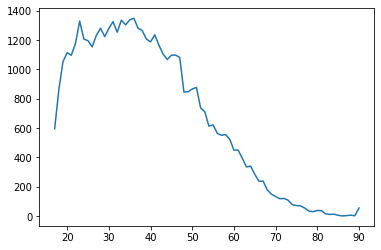

In [14]:
# visualization of age value count
df_full['age'].value_counts().sort_index().plot.line()

In [15]:
# age vs income distribution graph
def plot(column):
    if df_full[column].dtype != 'int64':
        f, axes = plt.subplots(1,1,figsize=(15,5))
        sns.countplot(x=column, hue='income', data = df_full)
        plt.xticks(rotation=90)
        plt.suptitle(column,fontsize=20)
        plt.show()
    else:
        g = sns.FacetGrid(df_full, row="income", margin_titles=True, aspect=4, height=3)
        g.map(plt.hist,column,bins=100)
        plt.show()
    plt.show()

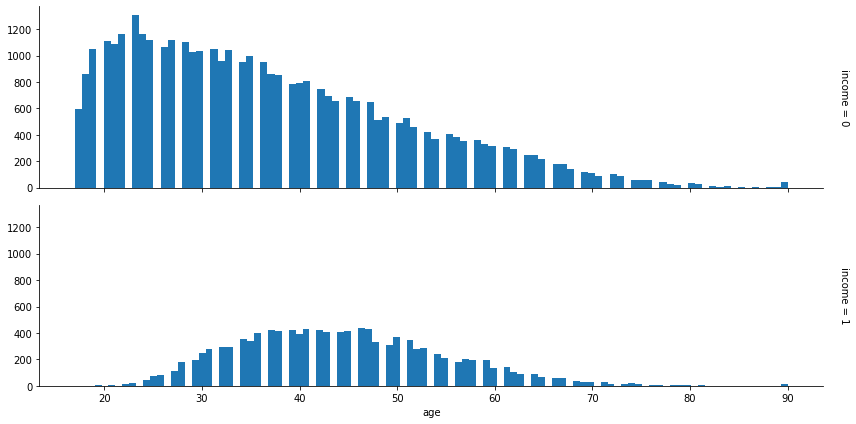

In [16]:
# visualization of age vs income distribution graph
plot('age')

In terms of the distribution of those earning above 50k having a normal distribution and the majority at a young age earning less than 50k, the graph is as predicted. Further evidence for this should come from looking at education levels, since people with higher education levels typically start working full time later in life yet earn greater wages.

In [17]:
# value count of work class
df_full['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Text(0.5, 1.0, 'Workclass distribution')

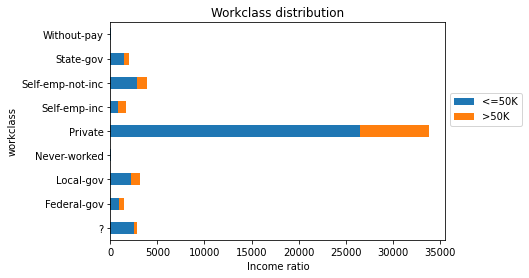

In [18]:
# visualization of Workclass distribution; workclass vs income
wrkcls = df_full.groupby(['workclass', 'income']).size().unstack()
wrkcls.plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('workclass')
plt.xlabel('Income ratio')
plt.title("Workclass distribution")

**This graph demonstrates that large number of the population is in private jobs and also that the private workclass has the highest number of people with both less than and greater than 50K salary. This is followed by self-emp-notinc workclass and local-gov workclass. we can also see that this particular column has null value in the form of '?'.**

In [19]:
# value count of education
df_full['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

Text(0, 0.5, 'input data numbers')

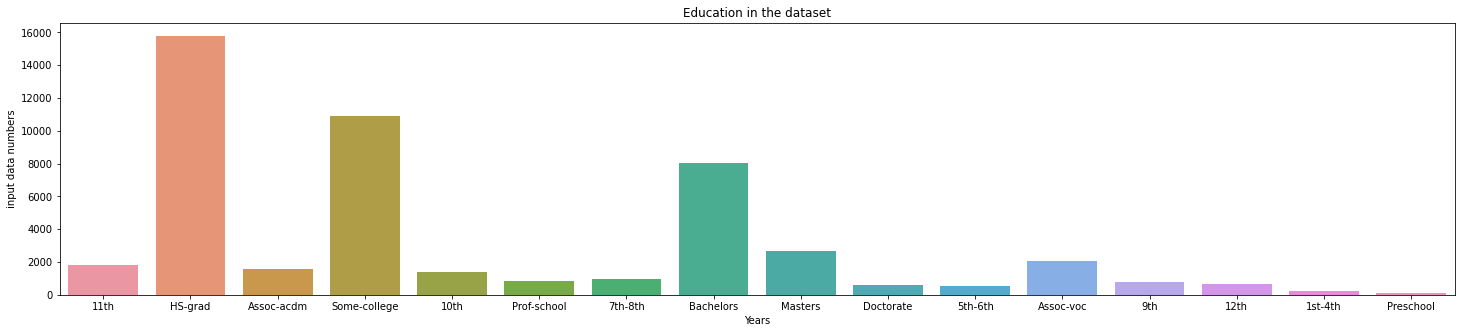

In [20]:
# visualization of education count
plt.figure(figsize=(25, 5))
sns.countplot(df_full['education'])
plt.title('Education in the dataset')
plt.xlabel('Years')
plt.ylabel('input data numbers')

Text(0.5, 1.0, 'Education distribution')

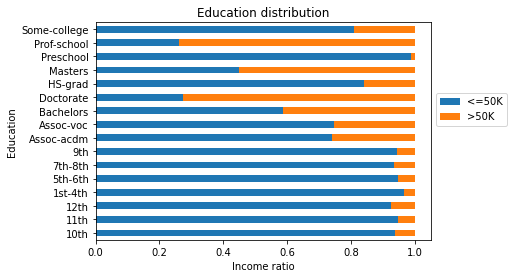

In [21]:
# visualization of education distribution; education vs income
edu = df_full.groupby(['education', 'income']).size().unstack()
edu.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Education')
plt.xlabel('Income ratio')
plt.title("Education distribution")

**This graph demonstrates that max number people having a degree of prof-school or doctorate have salary greater than 50K compared to other degrees. This is followed by masters and bachlors degree. And the people with least education like preschool degree only have least people with salary greater than 50K.**

In [22]:
# value count of marital-status
df_full['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

Text(0.5, 1.0, 'Relationship')

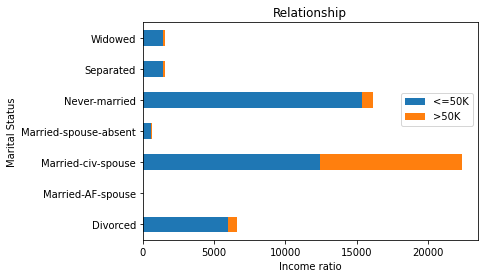

In [23]:
# visualization of marital-status distribution; marital-status vs income
ms = df_full.groupby(['marital-status', 'income']).size().unstack()
ms.plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Marital Status')
plt.xlabel('Income ratio')
plt.title("Relationship")

**Married-civ-spouse has an approximate 60:40 ration of salary less than and greater than 50k respectively. But the ones never married have mostly salary less than 50k.**

In [24]:
# value count of occupation
df_full['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

Text(0.5, 1.0, 'Occupation distribution')

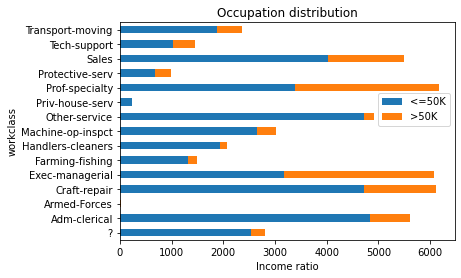

In [25]:
# visualization of occupation distribution; occupation vs income
occupation = df_full.groupby(['occupation', 'income']).size().unstack()
occupation.plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('workclass')
plt.xlabel('Income ratio')
plt.title("Occupation distribution")

**Occupation like Exec-managerial and Prof-speciality has more money as large number of people have salary more than 50k. Followed by Sales, Craft-repair and adm-clerical. Whereas, Priv-house-serv has nearly no one with salary more tahn 50k.**

In [26]:
# value count of relationship
df_full['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [27]:
# value count of race
df_full['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

Text(0.5, 1.0, 'Race distribution')

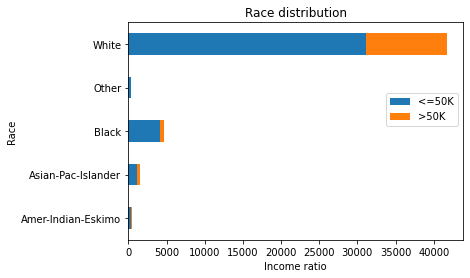

In [28]:
# visualization of race distribution; race vs income
race = df_full.groupby(['race', 'income']).size().unstack()
race.plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Race')
plt.xlabel('Income ratio')
plt.title("Race distribution")

**There's a large number of white working individuals and has an approximately 70:30 ratio of salary less than and greater than 50k.**

In [29]:
# value count of sex
df_full['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

Text(0.5, 1.0, 'Gender distribution')

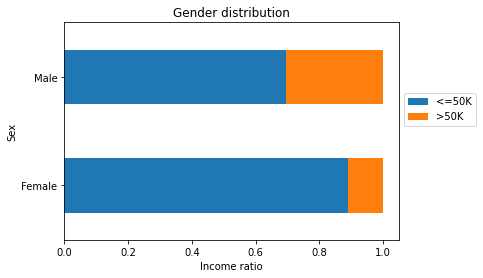

In [30]:
# visualization of gender distribution; gender vs income
sex_group = df_full.groupby(['sex', 'income']).size().unstack()
sex_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Sex')
plt.xlabel('Income ratio')
plt.title("Gender distribution")

**Female ratio has less number of women with salary greater than 50k whereas male has a comparetively greater ratio of individuals with salary greater than 50k.**

In [31]:
# value count of native-country
df_full['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

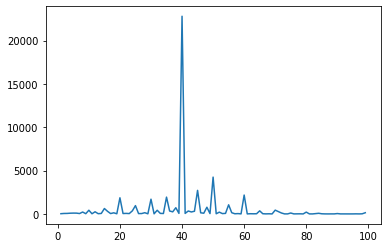

In [32]:
# visualization of hours-per-week value count
df_full['hours-per-week'].value_counts().sort_index().plot.line()

In [33]:
# tabular distribution of native-country and hours-per-week; native-country vs hours-per-week vs income
pd.crosstab(df_full['native-country'], df_full['income'], 
           values=df_full['hours-per-week'], aggfunc=np.mean)

income,0,1
native-country,,
?,39.552590,45.318182
Cambodia,41.157895,43.888889
Canada,37.378151,46.126984
China,36.686047,42.027778
Columbia,39.123457,56.250000
Cuba,39.201923,42.852941
Dominican-Republic,41.561224,42.800000
Ecuador,37.948718,47.833333
El-Salvador,35.819444,43.454545


**This table gives us an insight into different countries with average mean of individuals with salary greater than and less than 50k.**

## DATA CLEANING

### Imputing missing values using mode imputation method

In [34]:
# treating missing value using mode imputer
df_full['workclass'] = df_full['workclass'].replace('?','Private')
df_full['occupation'] = df_full['occupation'].replace('?','Prof-specialty')
df_full['native-country'] = df_full['native-country'].replace('?','United-States')

In [35]:
# checking for missing values
df_full.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [36]:
# binary encoding of gender column
df_full.sex = df_full.sex.replace('Male', 0)
df_full.sex = df_full.sex.replace('Female',1)

Cleaning up the data and removing redundent values to make more sense of the data based on the observation made during the visualization.

In [37]:
# cleaning up redundent data in marital status
df_full['marital-status'] = df_full['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df_full['marital-status'] = df_full['marital-status'].replace(['divorced','Seperated', 'widowed','married-spouse-absent'],'single-partner')

fnlwgt sampling weight, this is the number of people the census believes the entry represents, which doesnot help in predicting income, hence dropping it.
The column education is just a string representation of the column education-num. We will drop the education column.

In [38]:
#dropping fnlwgt and education column from table
df_full.drop(['fnlwgt', 'education'], axis=1, inplace=True)
df_full.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,9,married,Farming-fishing,Husband,White,0,0,0,50,United-States,0
2,28,Local-gov,12,married,Protective-serv,Husband,White,0,0,0,40,United-States,1
3,44,Private,10,married,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,1
4,18,Private,10,Never-married,Prof-specialty,Own-child,White,1,0,0,30,United-States,0


### LIKELY DISTRIBUTION OF THE NUMERIC VARIABLES

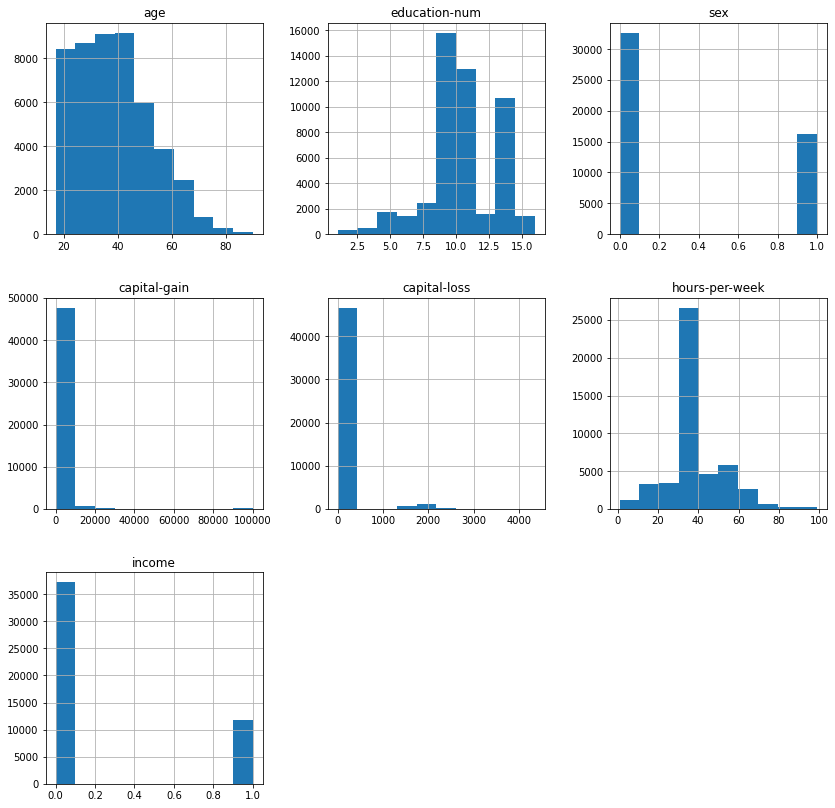

In [39]:
# visualization of numeric data distribution using histogram 
df_full.hist(figsize=(14,14), layout=(3,3), sharex=False);

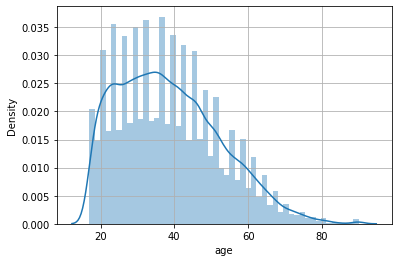

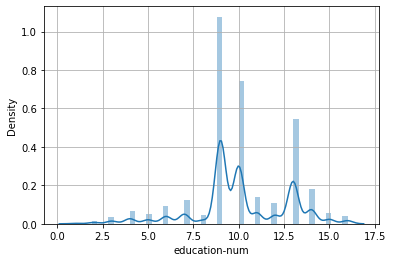

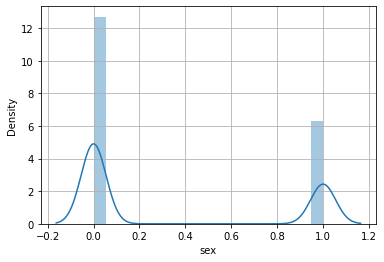

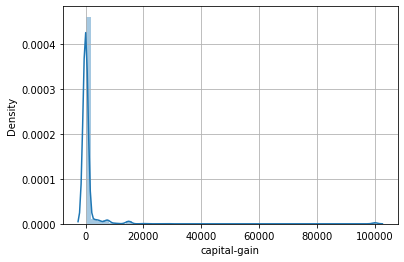

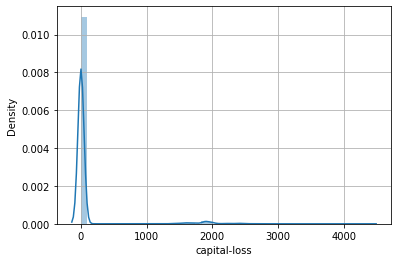

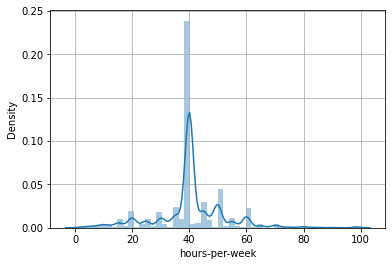

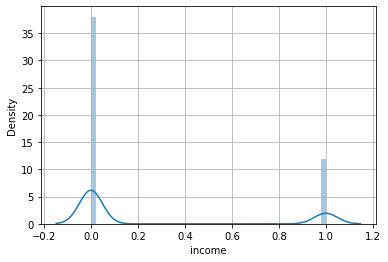

In [40]:
# visualization of numeric data distribution using density graph
List =['age', 'education-num', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']


def distribution(df_full,list):
  sns.distplot(df_full[list])
  plt.show()
for i in List:
  plt.grid(True)
  distribution(df_full,i)
  plt.show()

capital gain and capital loss are right skewed.

### Correlation matrix

In [41]:
# finding dependencies of independent variable on target variable using correlation matrix
df_full.corr()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income
age,1.000000,0.030940,-0.088120,0.077229,0.056944,0.071558,0.230369
education-num,0.030940,1.000000,-0.009328,0.125146,0.080972,0.143689,0.332613
sex,-0.088120,-0.009328,1.000000,-0.047094,-0.045480,-0.228560,-0.214628
capital-gain,0.077229,0.125146,-0.047094,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,0.080972,-0.045480,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,0.143689,-0.228560,0.082157,0.054467,1.000000,0.227687
income,0.230369,0.332613,-0.214628,0.223013,0.147554,0.227687,1.000000


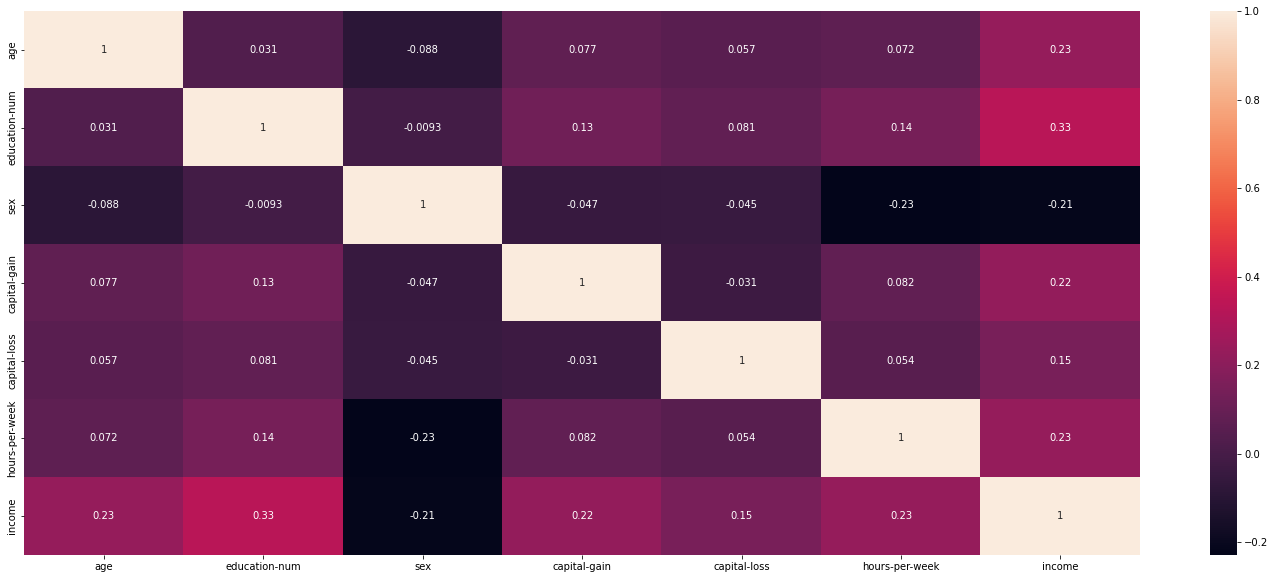

In [42]:
# plotting heat map for correlation matrix
plt.figure(figsize=(25,10))
sns.heatmap(df_full.corr(), annot=True)
plt.show()

education number with respect to income is directly correlated with a score of 0.33

age and hours per weeek are directly correlated to income with a score of 0.23

sex is inversly correlated to income with a score of -0.21

Hence, our most important feature is education number.

### OLS regression Model

In [43]:
# importing libraries for ols regression
import statsmodels.api as sm

In [44]:
# finding dependencies of independent variable on target variable using OLS regression model
model = sm.OLS(df_full['income'], df_full[['age', 'education-num', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 income   R-squared (uncentered):                   0.384
Model:                            OLS   Adj. R-squared (uncentered):              0.384
Method:                 Least Squares   F-statistic:                              5074.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                        0.00
Time:                        22:15:46   Log-Likelihood:                         -22547.
No. Observations:               48842   AIC:                                  4.511e+04
Df Residuals:                   48836   BIC:                                  4.516e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0022      0.000     19.000      0.000       0.002       0.002
education-num      0.0222      0.001     40.246      0.000       0.021       0.023
sex               -0.2021      0.004    -55.172      0.000      -0.209      -0.195
capital-gain     1.08e-05   2.35e-07     45.977      0.000    1.03e-05    1.13e-05
capital-loss       0.0001   4.34e-06     29.261      0.000       0.000       0.000
hours-per-week    -0.0001      0.000     -1.135      0.256      -0.000       0.000
==============================================================================
Omnibus:                     6701.638   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9546.162
Skew:                           1.071   Prob(JB):                         0.00
Kurtosis:                       2.677   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using p value to predict the influence of indepedent values on the target value i.e. income.

variables with p value less than 0.05 are significant. They are:

*   education-num
*   age
*   sex
* capital-gain
* capital-loss

hours-per-week has a p value of 0.256 hence it is less significant.



## OUTLIER DETECTION

### Using Box plot to detect Outliers

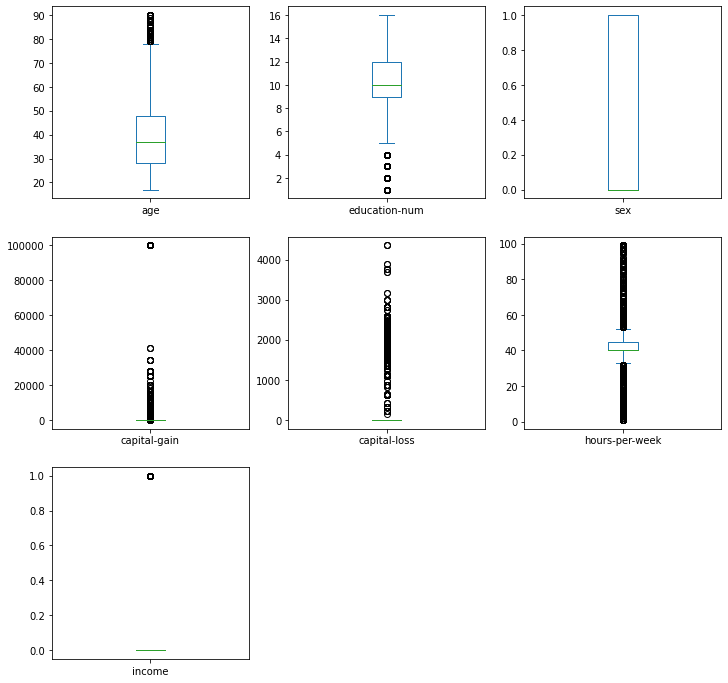

In [45]:
# plotting box plot to detect outliers
df_full.plot(kind='box', figsize=(12,12), layout=(3,3),sharex=False, subplots=True);

### Removing outliers

In [46]:
#Make a copy of data set to compare results
df_full_copy = df_full.copy()

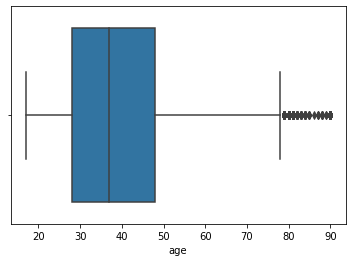

In [47]:
sns.boxplot(df_full_copy['age'])

In [48]:
# Position of the Outlier
print(np.where(df_full_copy['age']>78))

(array([  193,   234,   899,   926,   951,  1079,  1398,  1834,  2085,
        2290,  2982,  3496,  3668,  4455,  4646,  4658,  6402,  6577,
        6757,  6915,  6959,  6976,  6979,  7160,  7170,  7414,  7419,
        7539,  7547,  7937,  8206,  8313,  8427,  8955,  8982,  9018,
        9038,  9081,  9279,  9769,  9888, 10039, 10199, 10223, 10735,
       11289, 11328, 11410, 11837, 11871, 11881, 11940, 12060, 12229,
       12446, 13025, 13958, 14033, 14263, 14299, 14431, 14568, 14591,
       14740, 15088, 15098, 15408, 15934, 15963, 16003, 16106, 16148,
       16251, 16355, 16503, 16711, 17199, 17321, 17449, 18216, 18584,
       19035, 19172, 19187, 19492, 19619, 19818, 20058, 20244, 20351,
       20390, 21001, 21115, 21385, 21553, 21572, 21651, 21687, 22281,
       22454, 22495, 22513, 22720, 22905, 23029, 23762, 24001, 24153,
       24457, 24662, 24712, 24803, 24975, 25087, 25244, 25254, 25752,
       26405, 26491, 26826, 27380, 27519, 27793, 27813, 28012, 28277,
       28732, 28773

In [49]:
#IQR-Inter Quartile Range
range1 = np.percentile(df_full['age'], 25, interpolation = 'midpoint')
 
range2 = np.percentile(df_full['age'], 75, interpolation = 'midpoint')

IQR = range2 - range1
print("Shape Before removing Outliers: ", df_full_copy.shape)

Shape Before removing Outliers:  (48842, 13)


In [50]:
#upper bound
UB = np.where(df_full_copy['age'] >= (range2+1.5*IQR))
# Lower bound
LB = np.where(df_full_copy['age'] <= (range1-1.5*IQR))

In [51]:
#Removing Outliers
df_full_copy.drop(UB[0], inplace = True)
df_full_copy.drop(LB[0], inplace = True)
print("shape after removing Outliers:", df_full_copy.shape)

shape after removing Outliers: (48592, 13)


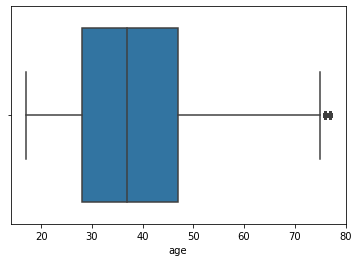

In [52]:
#BoxPlot after removing Outliers 
sns.boxplot(df_full_copy['age'])

## Preparing data and Label encoding categorical values

In [53]:
# splitting independent and target variables for dataframe with outliers
X = df_full_copy.drop(['income'], axis =1)
y = df_full_copy['income']

In [54]:
# making a copy of the dataframe with outliers
df_full_copy1 = df_full_copy.copy()

In [55]:
# label encoding for categorical values of dataframe with outliers
from sklearn.preprocessing import LabelEncoder
df_full_copy1= df_full_copy1.apply(LabelEncoder().fit_transform)
df_full_copy1.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,6,2,6,3,2,0,0,0,39,38,0
1,21,3,8,5,4,0,4,0,0,0,49,38,0
2,11,1,11,5,10,0,4,0,0,0,39,38,1
3,27,3,9,5,6,0,2,0,98,0,39,38,1
4,1,3,9,2,9,3,4,1,0,0,29,38,0


In [56]:
# using standard scaling for normalization on dataset with outliers
from sklearn.preprocessing import StandardScaler
ss= StandardScaler().fit(df_full_copy1.drop('income', axis=1))

In [57]:
X= ss.transform(df_full_copy1.drop('income', axis=1))
y= df_full_copy['income']

### Splitting Training and test data

In [58]:
# splitting training and testing datset (without outlier)
from sklearn.model_selection import  train_test_split
#X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.3, random_state=30)

In [59]:
# splitting training and testing datset (with outlier)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# MODELLING 

## LOGISTIC REGRESSION

In [61]:
# creating logistic regression object
from sklearn.linear_model import LogisticRegression
LR_copy = LogisticRegression(max_iter=1000)
# training data and predicting scores
MODEL = LR_copy.fit(X_train, y_train)
prediction_copy = MODEL.predict(X_test)

print("training data score: {:,.3f}".format(LR_copy.score(X_train, y_train)))
print("test data score: {:,.3f}".format(LR_copy.score(X_test, y_test)))

training data score: 0.839
test data score: 0.839


In [62]:
# importing libraries for log loss
from sklearn.metrics import log_loss

In [63]:
# finding %error on residuals using log loss 
logloss_copy = log_loss(y_test,MODEL.predict_proba(X_test))
logloss_copy

0.3481453364499211

**The error for logistic regression model is 0.34, which is considerable, because the log error for the supossed best model should be close to 0.**

## FEATURE ENGINEERING

In [64]:
#installing dependencies
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 34.8 MB/s 
     |████████████████████████████████| 133 kB 60.6 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=f4eeefd4ada491795a9b38e01f1c074c4ebef59e1dd50aae31762f9b9d7b49ae
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incomp

In [65]:
#importing libraries for permutation importance
import eli5
from eli5.sklearn import PermutationImportance
import numpy as np


In [66]:
#permutation importance to check important features
perm = PermutationImportance(MODEL).fit(X_test, y_test)
eli5.show_weights(perm)

Weight,Feature
0.0517 ± 0.0018,x2
0.0399 ± 0.0036,x3
0.0289 ± 0.0016,x8
0.0066 ± 0.0014,x9
0.0063 ± 0.0023,x10
0.0058 ± 0.0021,x0
0.0034 ± 0.0013,x7
0.0022 ± 0.0007,x5
0.0012 ± 0.0005,x1
0.0006 ± 0.0001,x4


X2 which is education-num is the most important feature. Followed by marital status.

## CONFUSION MATRIX

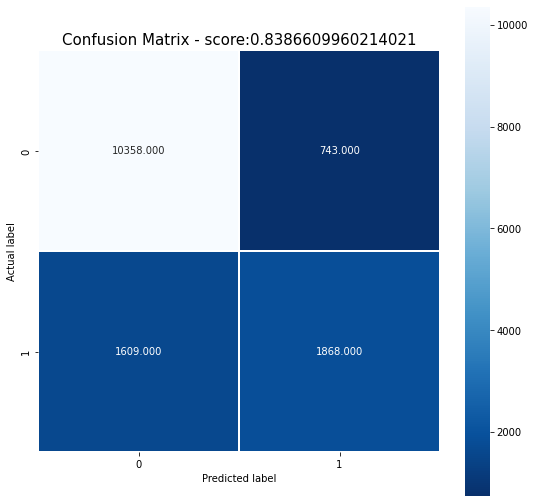

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11101
           1       0.72      0.54      0.61      3477

    accuracy                           0.84     14578
   macro avg       0.79      0.74      0.76     14578
weighted avg       0.83      0.84      0.83     14578



In [67]:
# confusing matrix for logistic regression
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, prediction_copy)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,prediction_copy))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,prediction_copy))

In confusion matrix x axis is actual values and y anxis is predicted values. 

From the above matrix we can say that 10358 is true positive, 743 is false positive, 1609 is false negative and 1868 is true negative.

# **H2O AutoML**

In [68]:
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgjdthvbg
  JVM stdout: /tmp/tmpgjdthvbg/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgjdthvbg/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_unknownUser_myraab
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [76]:
data = h2o.H2OFrame(df_full_copy1)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [77]:
data.head()

age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
8,3,6,2,6,3,2,0,0,0,39,38,0
21,3,8,5,4,0,4,0,0,0,49,38,0
11,1,11,5,10,0,4,0,0,0,39,38,1
27,3,9,5,6,0,2,0,98,0,39,38,1
1,3,9,2,9,3,4,1,0,0,29,38,0
17,3,5,2,7,1,4,0,0,0,29,38,0
12,3,8,2,9,4,2,0,0,0,39,38,0
46,5,14,5,9,0,4,0,52,0,31,38,1
7,3,9,2,7,4,4,1,0,0,39,38,0
38,3,3,5,2,0,4,0,0,0,9,38,0


In [78]:
y = "income" 
x = data.columns 

In [79]:
target=y
#data=h2o.deep_copy(df, 'data')
#data=h2o.deep_copy(data, 'df')

splits = data.split_frame(ratios=[0.75], seed=1)  

train = splits[0]
test = splits[1]

print ("Rows in Train",train.nrow)
print ("Rows in Test",test.nrow)

Rows in Train 36466
Rows in Test 12126


In [80]:
# Set up AutoML
import time
aml = H2OAutoML(max_runtime_secs=60)

In [81]:
# set model start time and train the aml model
model_start_time = time.time()
aml.train(x=x,y=y,training_frame=data)

AutoML progress: |
22:20:35.476: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

████
22:20:41.267: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
22:20:41.605: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
22:20:45.503: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
22:20:47.150: _response param, We

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_2_AutoML_2_20221215_222035

No summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.07710738432237584
RMSE: 0.27768216421364883
MAE: 0.1711424126430599
RMSLE: 0.1954395084843967
Mean Residual Deviance: 0.07710738432237584
R^2: 0.5697935864021
Null degrees of freedom: 9893
Residual degrees of freedom: 9886
Null deviance: 1773.3359372824455
Residual deviance: 762.9004604855866
AIC: 2742.0243841981855

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.0879204937309986
RMSE: 0.2965139014127307
MAE: 0.18185551136027506
RMSLE: 0.20748491766299382
Mean Residual Deviance: 0.0879204937309986
R^2: 0.5329480671469905
Null degrees of freedom: 4846
Residual degrees of freedom: 4839
Null deviance: 913.8987363799708
Residual deviance: 426.1506331141502
AIC: 1988.5706948392196

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [82]:
# printing the leaderBoard for models used
print(aml.leaderboard)

model_id                                                     rmse        mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_2_20221215_222035     0.296514  0.0879205  0.181856  0.207485                 0.0879205
StackedEnsemble_BestOfFamily_3_AutoML_2_20221215_222035  0.296626  0.0879868  0.182429  0.207608                 0.0879868
StackedEnsemble_AllModels_1_AutoML_2_20221215_222035     0.296633  0.0879914  0.181287  0.207601                 0.0879914
StackedEnsemble_BestOfFamily_2_AutoML_2_20221215_222035  0.296636  0.0879928  0.182254  0.20752                  0.0879928
GBM_2_AutoML_2_20221215_222035                           0.29696   0.0881853  0.182647  0.207799                 0.0881853
GBM_3_AutoML_2_20221215_222035                           0.297378  0.0884338  0.182933  0.208217                 0.0884338
GBM_4_AutoML_2_20221215_222035                           0.297443  0.0884724  0.18121   0.208399                 0.0884724
GBM_5_AutoML_2_2

In [83]:
# predicting on test data
prediction = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [84]:
prediction.head()

predict
0.405061
0.00158677
0.0337383
-0.001574
0.704677
0.00827408
-0.00223493
0.0037097
0.913807
-0.00234176


In [85]:
# finding and storing the best model
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

In [86]:
# printing the best model
best_model.algo

'stackedensemble'

In [87]:
# performance of the gbm model
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.08150479981650455
RMSE: 0.28549045486058644
MAE: 0.1747850166995255
RMSLE: 0.2002520121168424
Mean Residual Deviance: 0.08150479981650455
R^2: 0.551542807401296
Null degrees of freedom: 12125
Residual degrees of freedom: 12118
Null deviance: 2204.1034328782603
Residual deviance: 988.3272025749341
AIC: 4029.0831388506435

# **SHAP Analysis**

In [88]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 36.6 MB/s 


## Linear Model

In [105]:
import shap
explainer = shap.Explainer(MODEL.predict, X_train)
shap_values = explainer(X_test)

Permutation explainer: 14579it [02:50, 82.98it/s]                           


In [109]:
shap.initjs()

shap.plots.force(shap_values[10])

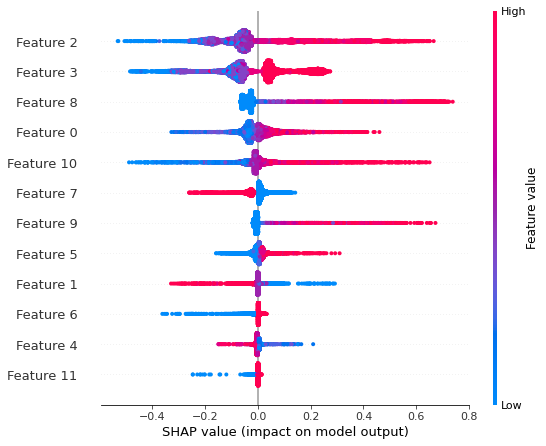

In [110]:
shap.summary_plot(shap_values)

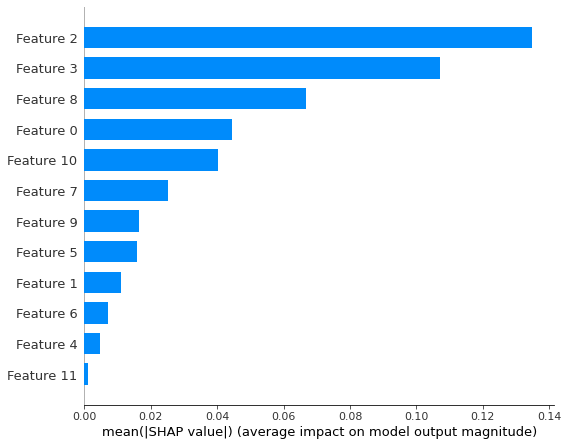

In [111]:
shap.summary_plot(shap_values, plot_type="bar")

Feature 2 which is education-num is the most important feature. Followed by marital status as feature 3.

## AutoML

In [114]:
from h2o.estimators import H2OGeneralizedLinearEstimator

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_2_20221215_222035_model_1,0.233168,0.0543675,0.127916,0.164139,0.0543675,3289,0.018279,GBM
DRF_1_AutoML_2_20221215_222035,0.248677,0.0618404,0.142355,0.174872,0.0618404,3438,0.017071,DRF
XGBoost_1_AutoML_2_20221215_222035,0.269308,0.0725266,0.164614,0.190229,0.0725266,5754,0.004972,XGBoost
XRT_1_AutoML_2_20221215_222035,0.269708,0.0727424,0.163685,0.188602,0.0727424,6221,0.018089,DRF
XGBoost_2_AutoML_2_20221215_222035,0.276927,0.0766885,0.16942,0.195002,0.0766885,2361,0.003526,XGBoost
GBM_4_AutoML_2_20221215_222035,0.281165,0.0790537,0.171141,0.197184,0.0790537,1914,0.024271,GBM
XGBoost_grid_1_AutoML_2_20221215_222035_model_2,0.281436,0.0792061,0.171324,0.197569,0.0792061,4074,0.002894,XGBoost
StackedEnsemble_BestOfFamily_1_AutoML_2_20221215_222035,0.284149,0.0807406,0.177329,0.199262,0.0807406,1240,0.02094,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20221215_222035,0.284948,0.0811954,0.17462,0.199777,0.0811954,1211,0.057138,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_2_20221215_222035,0.285095,0.0812792,0.175239,0.199877,0.0812792,1315,0.063903,StackedEnsemble


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

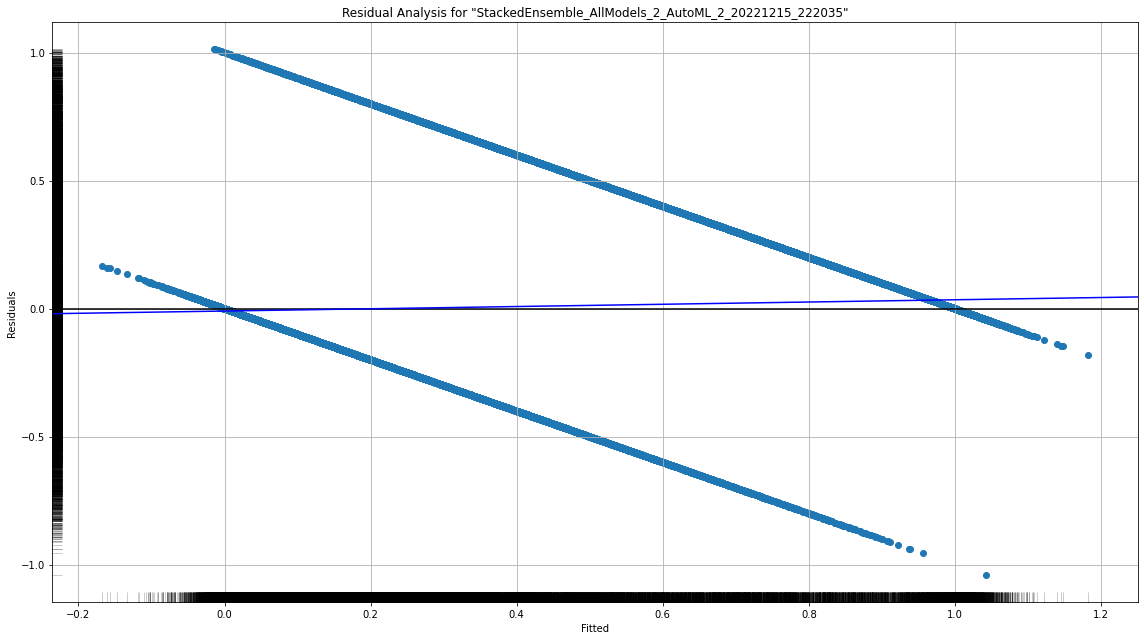

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

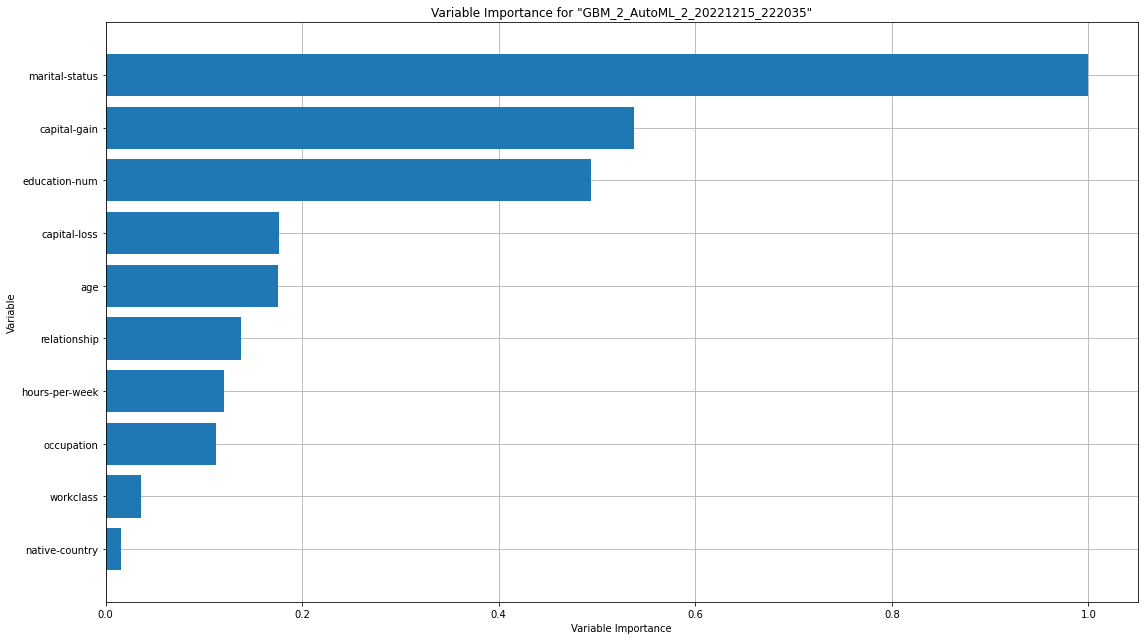

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

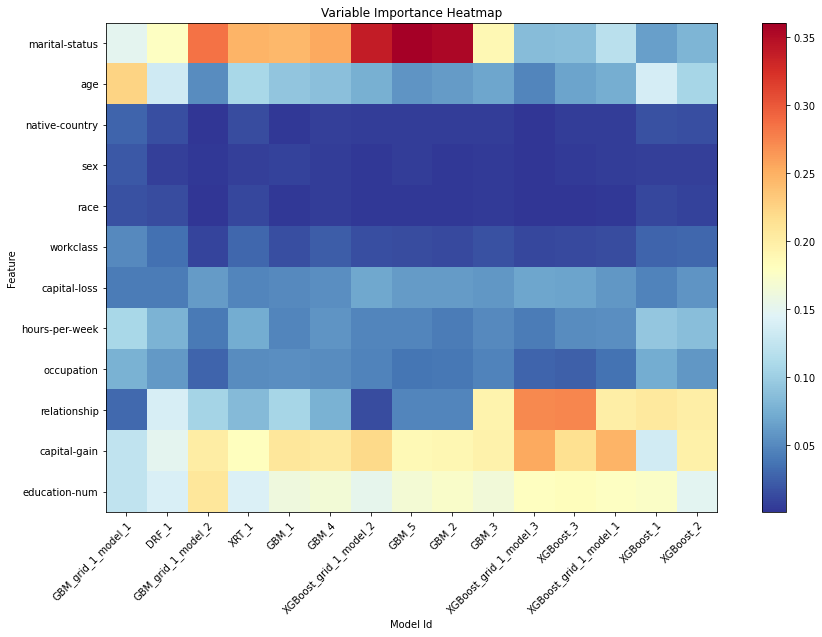

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

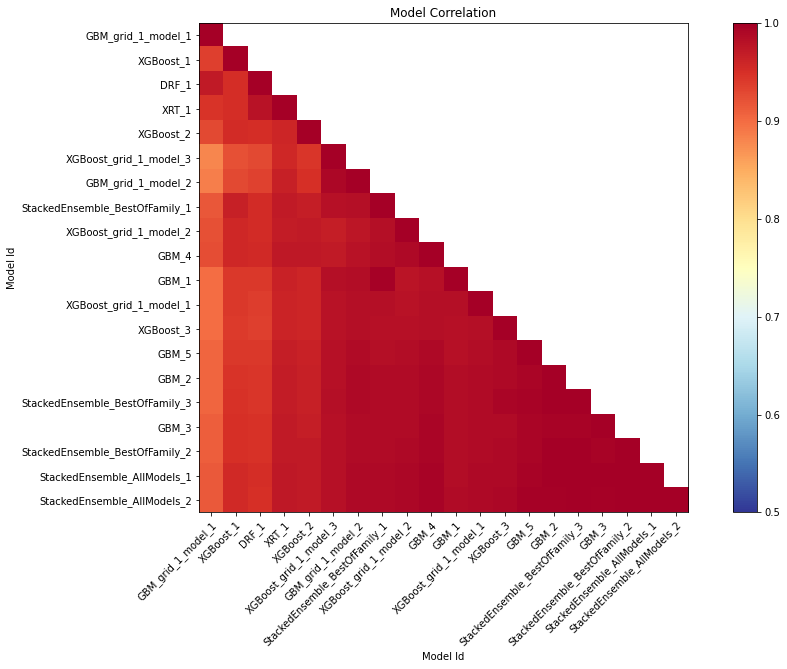

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

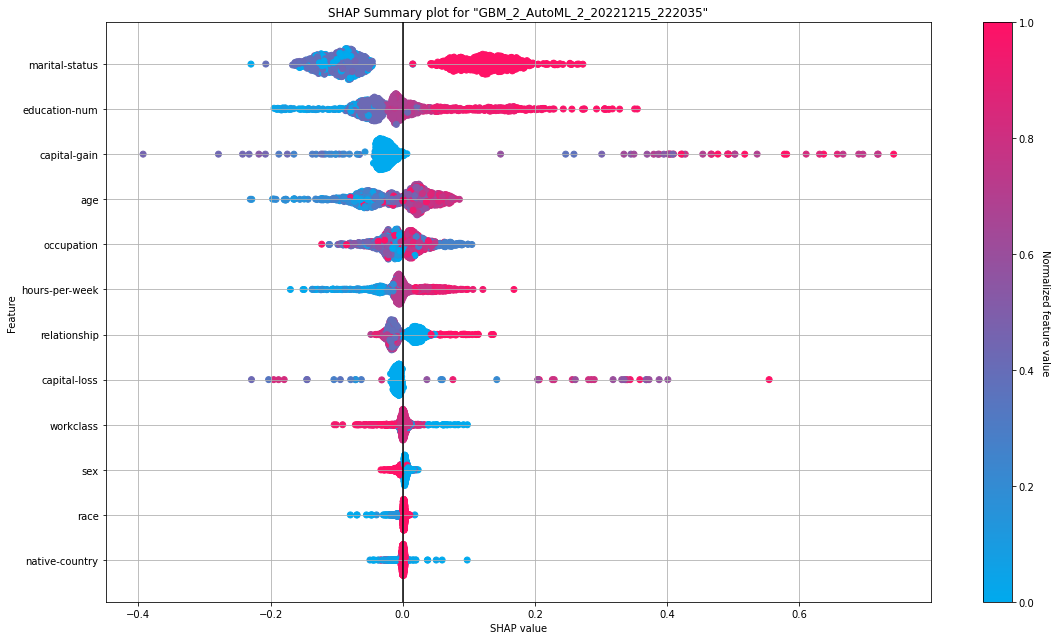

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

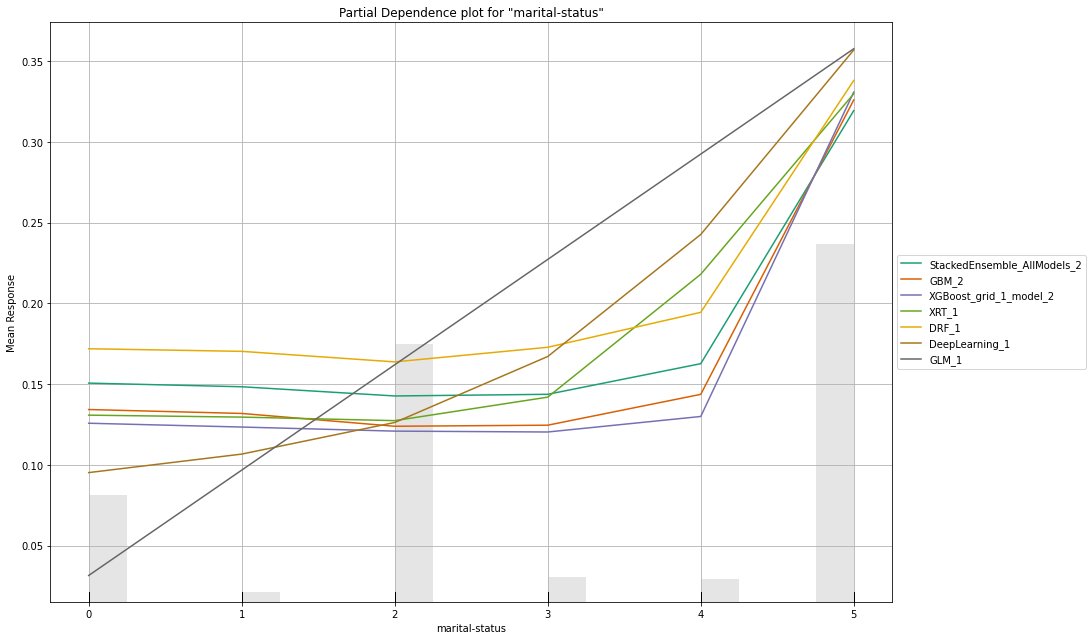

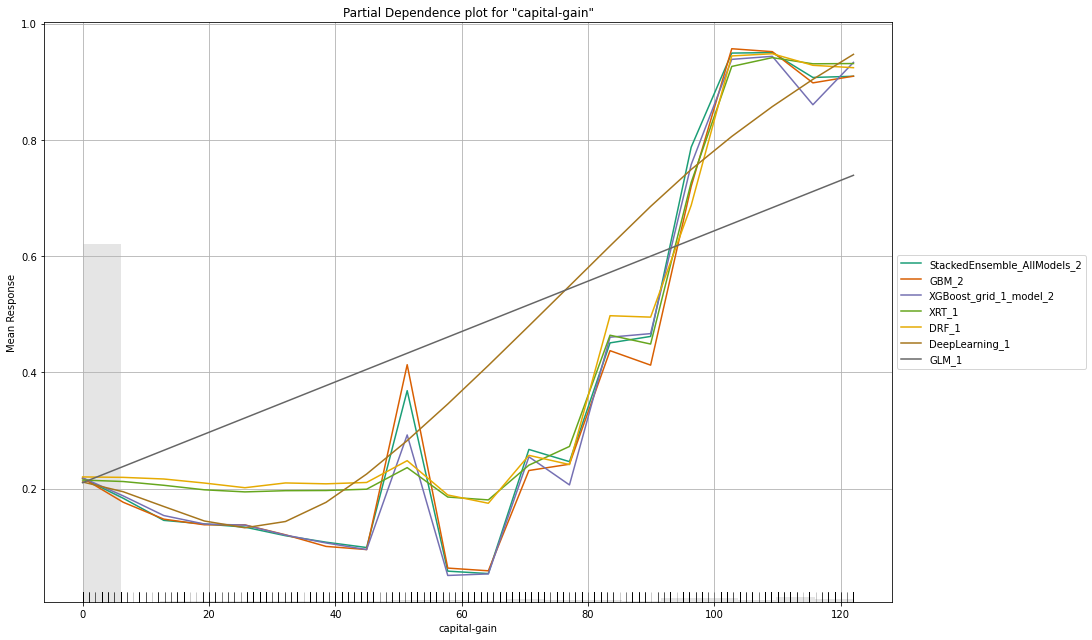

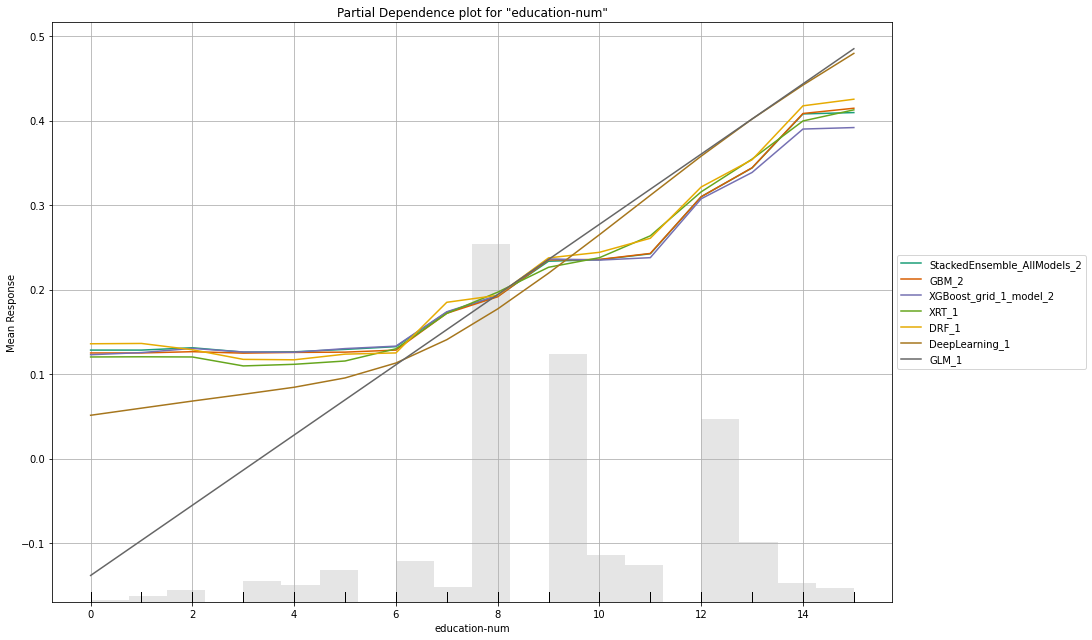

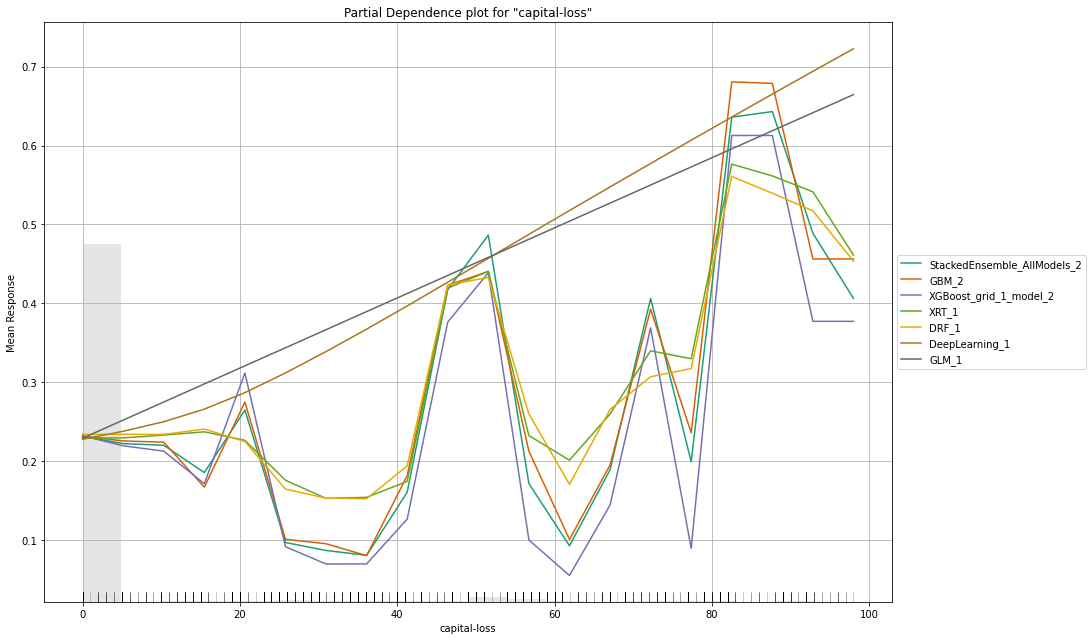

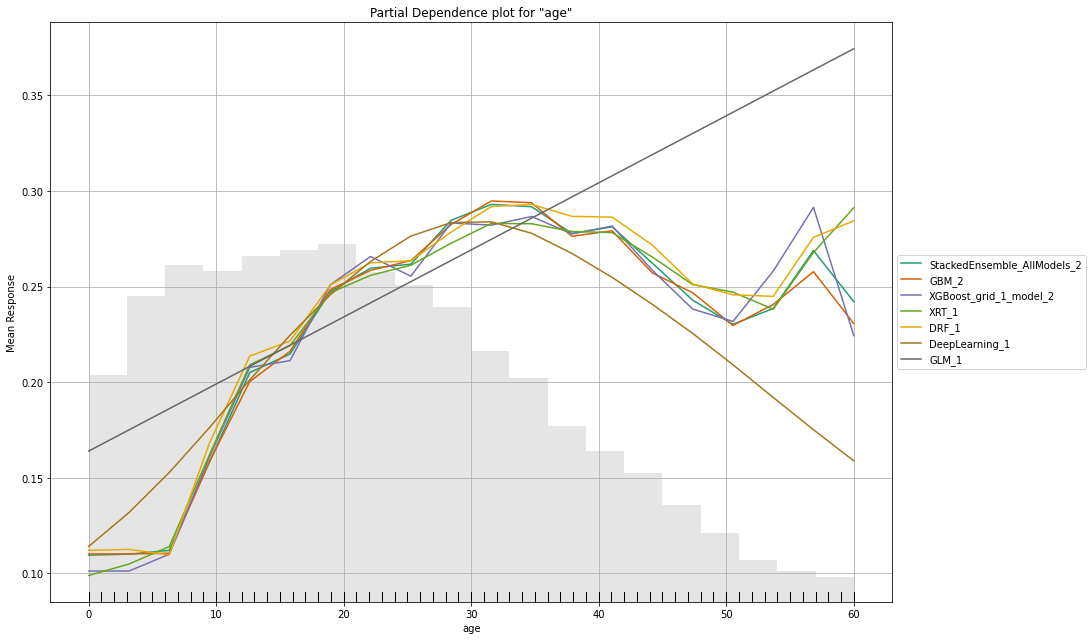

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

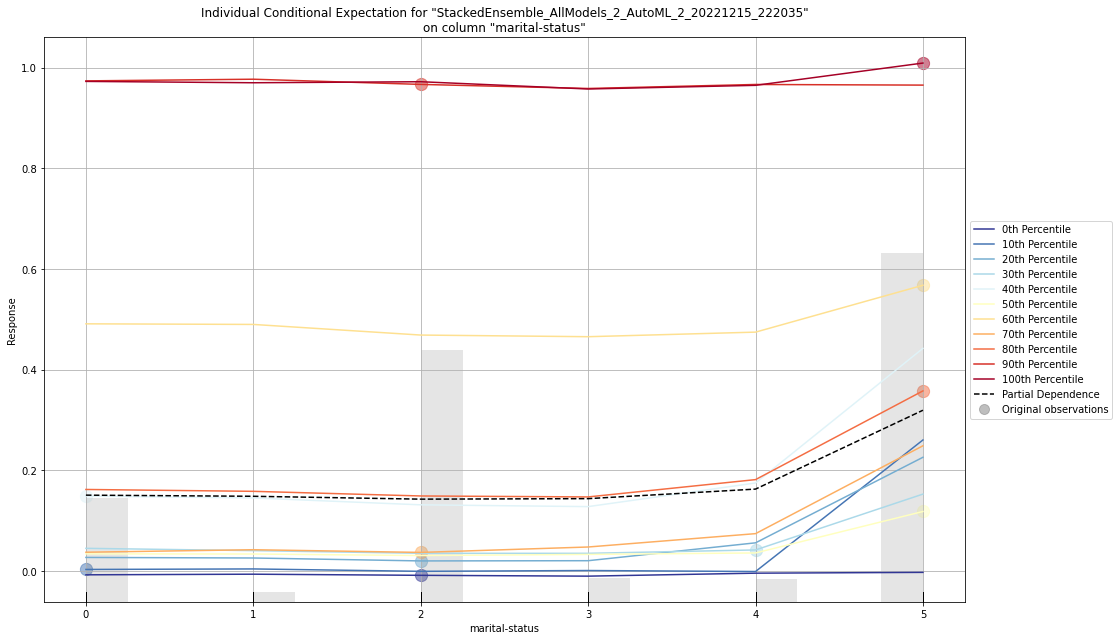

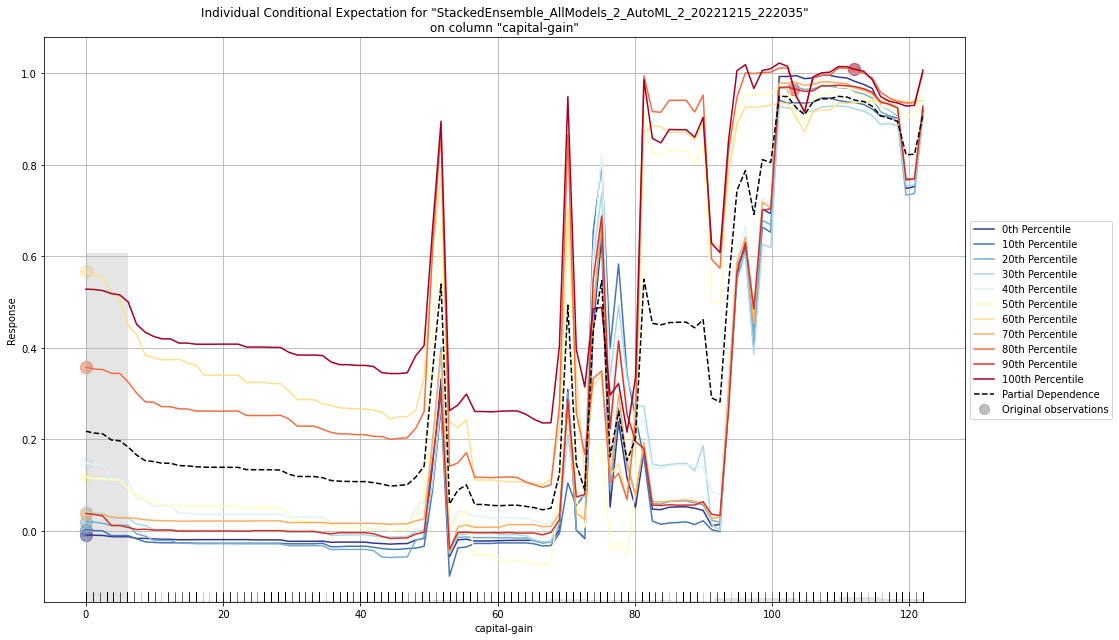

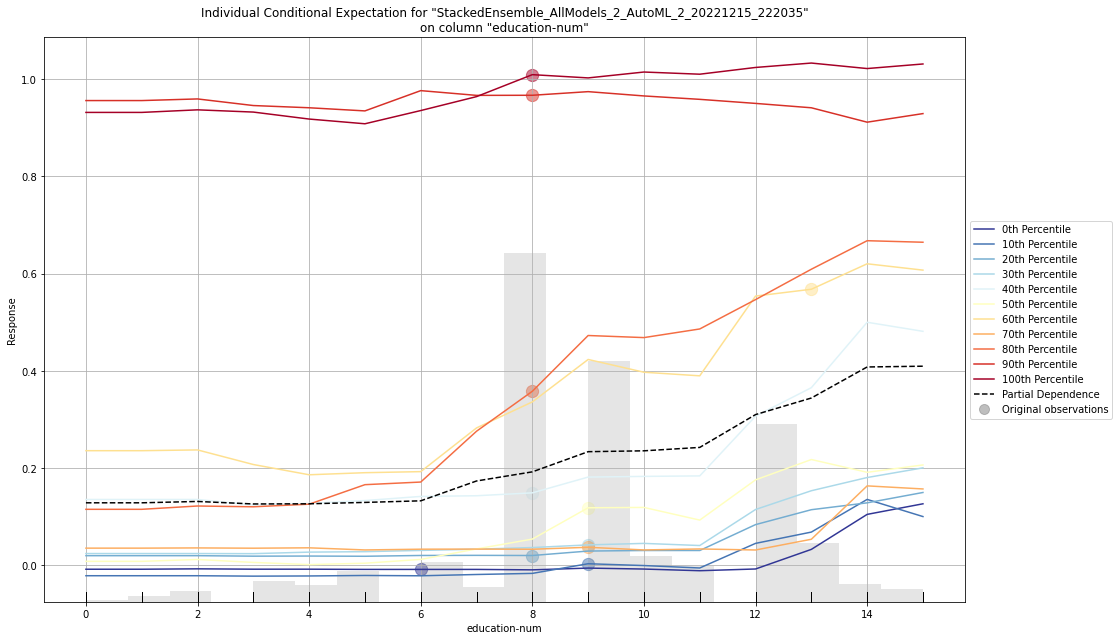

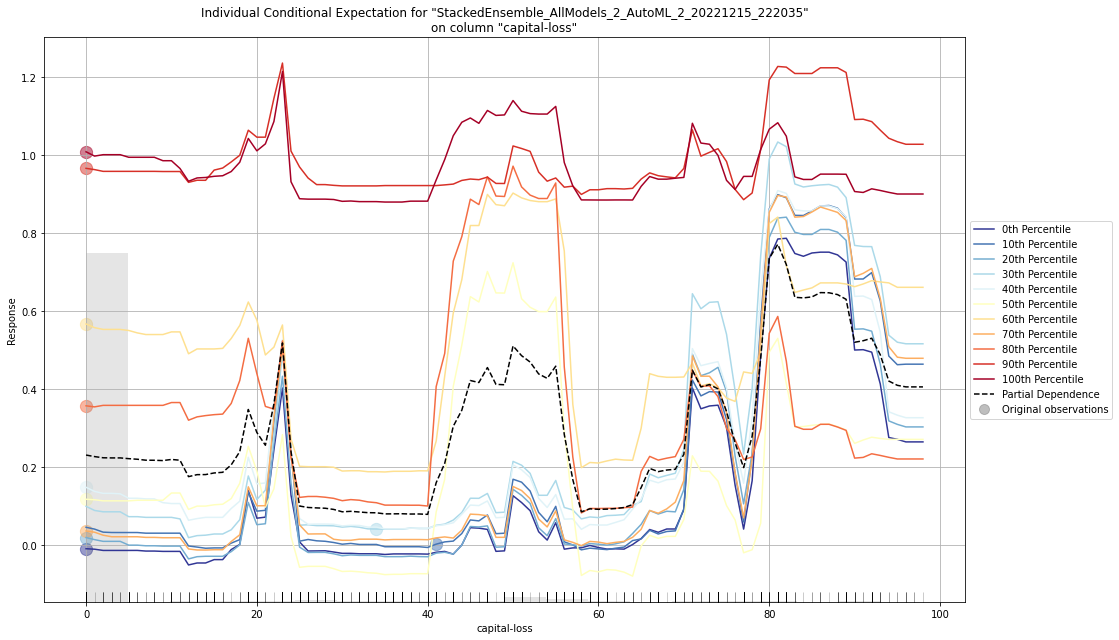

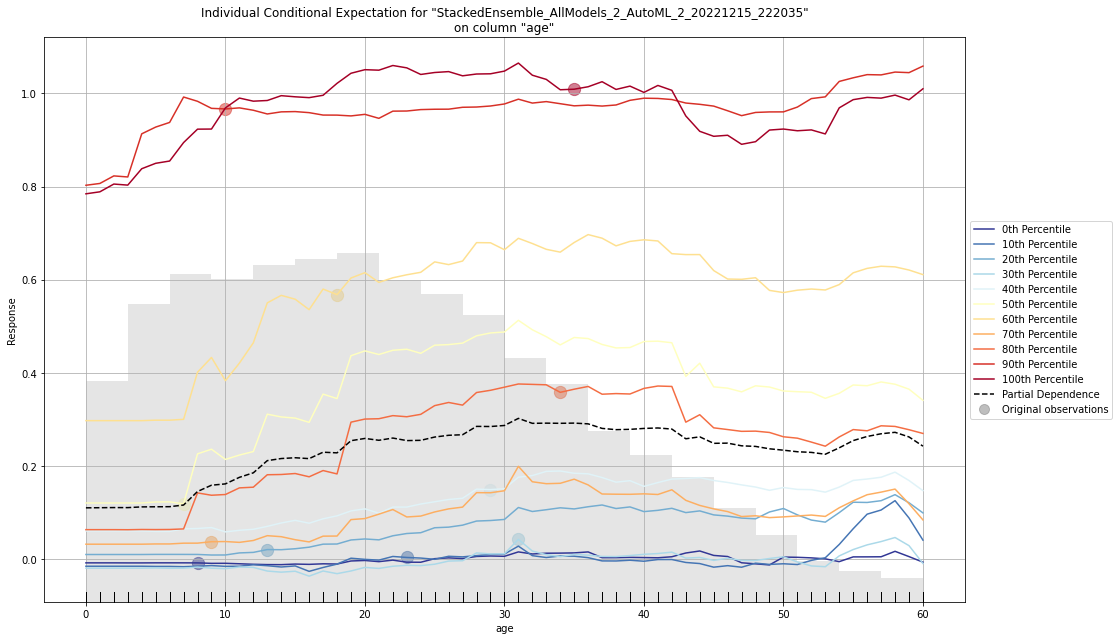

In [115]:
model_explain = aml.explain(data)

# Q3. How well did it work?

Our model worked well, achieving an accuracy of 83% on both the training and testing datasets, and the error was measured using the log loss approach, yielding a value of 0.34. Later, AutoML and SHAP analyses were carried out. The AutoML leaderboard stacked ensemble model performed very well, with loss values as low as 0.81, MSE values as low as 0.28, and R2 values as low as 0.55. Through SHAP analysis we found out the most important feature affecting the target variable.

# Q4. What did you learn?
This was a regression model-based task that helped me determine the strength of correlations between variables. Regression analysis can tell us how much of the overall variability in the data is explained by your model using statistical metrics such as R-squared / adjusted R-squared. I was also able to identify which traits are excellent predictors for the target variable and which aren't. This helped me in presenting my findings in sample and interpretable manner. Ultimately, it's critical to understand how numbers from a model are generated and interpreted.

# **References**
* Sckit learn offcial documentation
* Refered Towards Data Science
* Eli5 official documentation
* Kaggle
* python.org


* How to Interpret P-values and Coefficients in Regression Analysis

* Shap values-lesson 9 module

* Shap Values- Kaggle Notebook

* SHAP: A reliable way to analyze model interpretability

* Explaining Random Forest Model With Shapely Values

* Colab Notebook on AutoML Using H2O

* Bank_Personal_Loan_Modelling.ipynb

* H2O shap Blog

The dataset was taken from kaggle and the algorithms were referred directly from the Sckit learn official documentation. Visualization was mentioned in the Towards Data Science and Machine Learning with Scikit-Learn Quick Start Guides. The remainder of the code was created on my own. Eli5's official documentation is used to determine the relevance of each feature.

# **Copyright**
Copyright 2022 Shalini Shree

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.